<a href="https://colab.research.google.com/github/Jojocko/NLP-projects-/blob/main/jo_supply_chain_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 100)

df = pd.read_csv('/content/drive/My Drive/dataset.csv')
df.head(5)



,Commentaire,star,date,client,reponse,source,company,langage,cleaned_words,cleaned_lemma,Sentiment
0,"Colis commandé mardi 28 fevrier 23 , livraison le jeudi 02 mars 23 produit non recu au 7 mars 23Au prix du colis, amazon des incapables et chronopost pareilService client qui veule que je patiente une journée de plusLe colis est introuvable et meme chronopost renvoie la balle a amazonAmazon veut pas me renvoyé un autre article alors que ca fait une semaine que j'attend ce colis",1,2023-03-07,Toto,NaN,TrustPilot,Amazon,fr,colis commandé mardi fevrier livraison jeudi mars produit non recu mars 23au prix colis amazon incapables chronopost pareilservice client veule patiente journée plusle colis introuvable chronopost renvoie balle amazonamazon veut renvoyé article ca semaine attend colis,colis commander mardi fevrier livraison jeudi mars produit non recu mars 23au prix colis amazon incapable chronopost pareilservic client veule patient journée plusle colis introuvable chronopost renvoyer balle amazonamazon vouloir renvoyer article ca semaine attendre colis,__label__NEGATIVE
1,Amazon avec sa politique de retour est la pire que j ai vu contrairement a d autre site marchand.Montre défectueuse rendu il y a 10 jours et toujours pas de remboursement ce sont des méthodes de voleurs et de voyous et au téléphone il n y a que des incompétents et personne n a la même version de jours de retourAmazon c est a fuir dernière fois que je commande chez eux la concurrence est plus professionnelle.,1,2023-03-07,nasri eddine,NaN,TrustPilot,Amazon,fr,amazon politique pire contrairement site marchand.montre défectueuse rendu jours remboursement méthodes voleurs voyous téléphone incompétents version jours retouramazon fuir dernière fois commande concurrence professionnelle,amazon politique pire contrairement site marchand.montr défectueux rendre jour remboursement méthode voleur voyou téléphone incompétent version jour retouramazon fuir dernier fois commande concurrence professionnel,__label__NEGATIVE
2,"Dieu sait que j'en connais des déboires avec les sites marchands. Amazon n'échappe pas à la règle, il m'arrive d'expérimenter quelques désagréments. CEPENDANT, je n'ai rien à redire sur le service client d'Amazon. Les agents sont vraiment tournés vers la satisfaction du client. Ca change des autres commerces. Etant Prime, les livraisons rapides et retours gratuits sont très appréciables. Les autres commerces devraient s'en inspirer !!!",4,2023-03-07,Amandine,NaN,TrustPilot,Amazon,fr,dieu connais déboires sites marchands amazon échappe règle arrive expérimenter désagréments rien redire service client amazon agents vraiment tournés satisfaction client ca change commerces prime livraisons rapides retours gratuits appréciables commerces devraient inspirer,dieu connaître déboire site marchand amazon échapper règle arriver expérimenter désagrément rien redire service client amazon agent vraiment tourner satisfaction client ca changer commerce prime livraison rapide retour gratuit appréciable commerce devoir inspirer,__label__POSITIVE
3,"Nul, preleve une commande que je n'ai jamais reçu et le service client laisse des blancs jusqu'à ce qu'on raccroche et ça sur plusieurs appel. Donc amazone ma volé Dernière commande pour moi passé chez eux, ça m'apprendras à vouloir acheter chez les americains",1,2023-03-07,Bob Brico,NaN,TrustPilot,Amazon,fr,preleve commande jamais reçu service client laisse blancs jusqu' raccroche appel amazone volé dernière commande passé apprendras vouloir acheter americains,prelev commande jamais recevoir service client laisse blanc jusque raccrocher appel amazone voler dernier commande passer apprendre vouloir acheter americain,__label__NEGATIVE
4,Colis soit disant livré mais jamais reçu donc perdu non remboursé et falsification du bon de livraison soit disant signé par mes soins (Signature en majuscule) MDR je ne signe jamais de documents en majuscule ils moquent de leurs clients je vais résilier mon aboment Amazon Prime et en finir ave

In [ ]:
df = df.drop(['client', 'langage', 'reponse'], axis=1)
df.rename(columns={'Sentiment': 'sentiment', 'Commentaire': 'commentaire'}, inplace=True)
df['sentiment'] = df['sentiment'].replace({'__label__POSITIVE': 'positif', '__label__NEGATIVE': 'negatif', '__label__NEUTRAL': 'neutre'})
df['date'] = df['date'].fillna(method="ffill")
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year # pour visualiser par année et non par jour/mois/année

df.grouby('sentiment')['commentaire'].count()


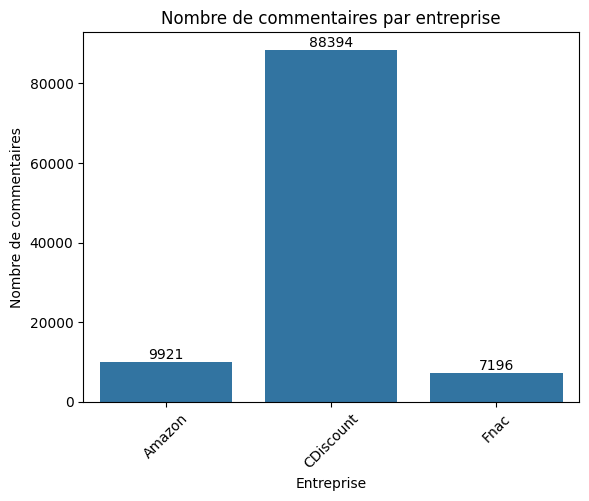

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nb de commentaires par entreprise

nb_commentaires = df.groupby('company')['commentaire'].count() # nb de commentaires par entreprise

sns.barplot(x=nb_commentaires.index, y=nb_commentaires.values)
plt.xlabel('Entreprise')
plt.ylabel('Nombre de commentaires')
plt.title('Nombre de commentaires par entreprise')
plt.xticks(rotation=45)
for index, value in enumerate(nb_commentaires.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()




On observe que le dataset n'est pas représentatif, avec beaucoup plus de commentaires pour CDiscount.

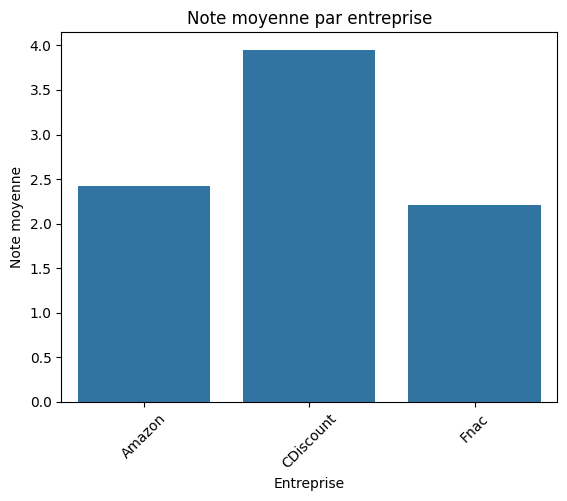

In [ ]:
# Note moyenne par entreprise

notes = df.groupby('company').agg({'star': 'mean'}) # répartition des notes par entreprise

sns.barplot(x=notes.index, y=notes['star'])
plt.xlabel('Entreprise')
plt.ylabel('Note moyenne')
plt.title('Note moyenne par entreprise')
plt.xticks(rotation=45)
plt.show()



Sans rentrer dans les détails chronologiques, CDiscount est mieux notée que Fnac et Amazon sur une période d'une dizaine d'années.



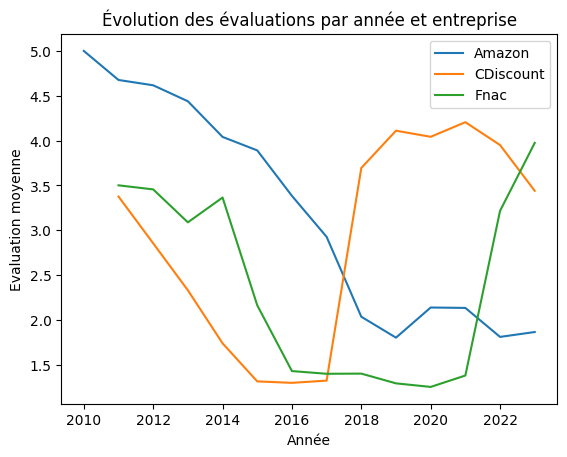

In [ ]:
# Évolution des évaluations

evolution = df.groupby([df['date'].dt.year, 'company']).agg({'star': 'mean'}) # évolution des notes par année et entreprise

for company in evolution['star'].unstack().columns:
    plt.plot(evolution['star'].unstack()[company], label=company)

plt.xlabel('Année')
plt.ylabel('Evaluation moyenne')
plt.title('Évolution des évaluations par année et entreprise')
plt.legend()
plt.show()


L'analyse chronologique montre que pour CDiscount, la note moyenne a escaladé en 2017, alors que la tendance générale pour Amazon est à la baisse et que pour Fnac, la hausse des notes débute en 2021. Il serait alors intéressant de voir si la hausse des notes correspond à une hausse ou baisse du nombre de commentaires.


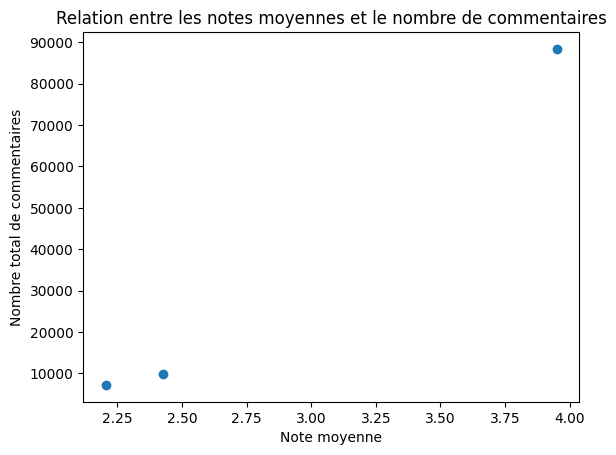

In [ ]:
# Relation entre nb de commentaires et notes moyennes

plt.figure
plt.scatter(notes['star'], nb_commentaires.values)

plt.xlabel('Note moyenne')
plt.ylabel('Nombre total de commentaires')
plt.title('Relation entre les notes moyennes et le nombre de commentaires')

plt.show()


Il est clair que pour CDiscount, plus le nombre de commentaires augmente, plus la note moyenne augmente aussi.


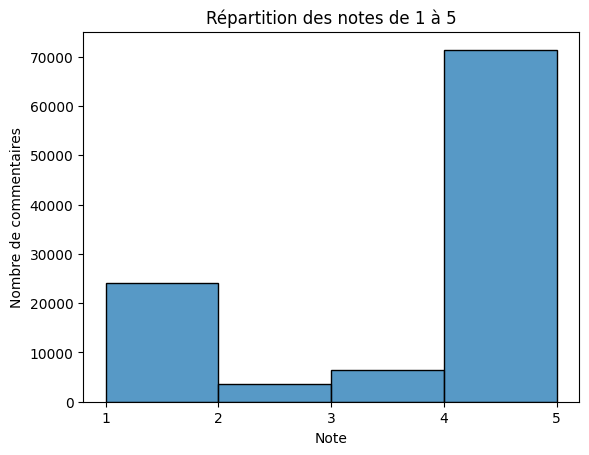

In [ ]:
# Répartition des notes

plt.figure
sns.histplot(data=df, x='star', binwidth=1, kde=False)

plt.xlabel('Note')
plt.ylabel('Nombre de commentaires')
plt.title('Répartition des notes de 1 à 5')
plt.xticks(range(1, 6))
plt.show()


Les notes 2 et 3 sont sous-représentés, indiquant que les internautes écrivent des commentaires pour dire qu'ils sont soit très satisfaits ou soit très insatisfaits.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


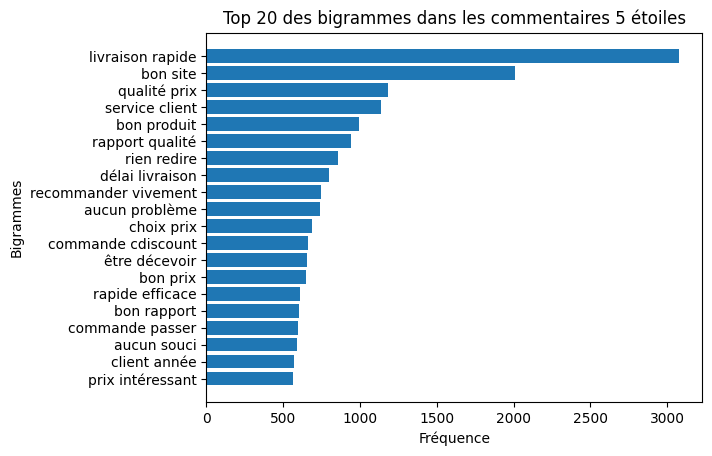

In [ ]:
# n-grammes

from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import nltk

import nltk
nltk.download('stopwords')
nltk.download('punkt') # Si vous n'avez pas déjà téléchargé le tokenizer 'punkt'


stop_words = set(stopwords.words('french'))
adverbes = {'très', 'beaucoup', 'bien', 'mal', 'ainsi', 'aussi', 'toujours', 'jamais', 'vraiment', 'particulièrement', 'souvent'}
stop_words.update(adverbes)

# Filtrage des commentaires à 5 étoiles
df_5_stars = df[df['star'] == 5]
text_5_stars = ' '.join(df_5_stars['cleaned_lemma'].dropna())

# Tokenisation et suppresion des stopwords
words = [word for word in word_tokenize(text_5_stars.lower()) if word.isalpha() and word not in stop_words]

# Bigramme
bigrammes = list(bigrams(words))
bigramme_freq = Counter(bigrammes)
top_20_bigrammes = bigramme_freq.most_common(20)

bigrammes_labels = [' '.join(bigram) for bigram, freq in top_20_bigrammes]
frequences = [freq for bigram, freq in top_20_bigrammes]

plt.figure
plt.barh(bigrammes_labels, frequences)
plt.xlabel('Fréquence')
plt.ylabel('Bigrammes')
plt.title('Top 20 des bigrammes dans les commentaires 5 étoiles')
plt.gca().invert_yaxis()
plt.show()


Ce bigramme indique que la note de 5 étoiles est largement influencée par la livraison rapide.

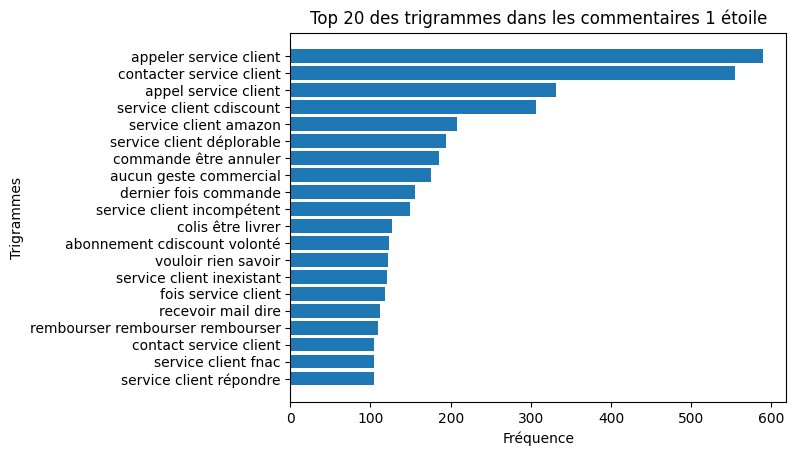

In [ ]:
from nltk import trigrams

# Filtrage des commentaires à 1 étoile
df_1_stars = df[df['star'] == 1]
text_1_stars = ' '.join(df_1_stars['cleaned_lemma'].dropna())

# Tokenisation et suppression des stopwords
words = [word for word in word_tokenize(text_1_stars.lower()) if word.isalpha() and word not in stop_words]

# Trigramme
trigrammes = list(trigrams(words))
trigramme_freq = Counter(trigrammes)
top_20_trigrammes = trigramme_freq.most_common(20)
trigrammes_labels = [' '.join(trigram) for trigram, freq in top_20_trigrammes]
frequences = [freq for trigram, freq in top_20_trigrammes]

plt.figure
plt.barh(trigrammes_labels, frequences)
plt.xlabel('Fréquence')
plt.ylabel('Trigrammes')
plt.title('Top 20 des trigrammes dans les commentaires 1 étoile')
plt.gca().invert_yaxis()
plt.show()



Ce bigramme indique une évaluation négative du service client, que ce soit chez Fnac, Amazon ou CDiscount.

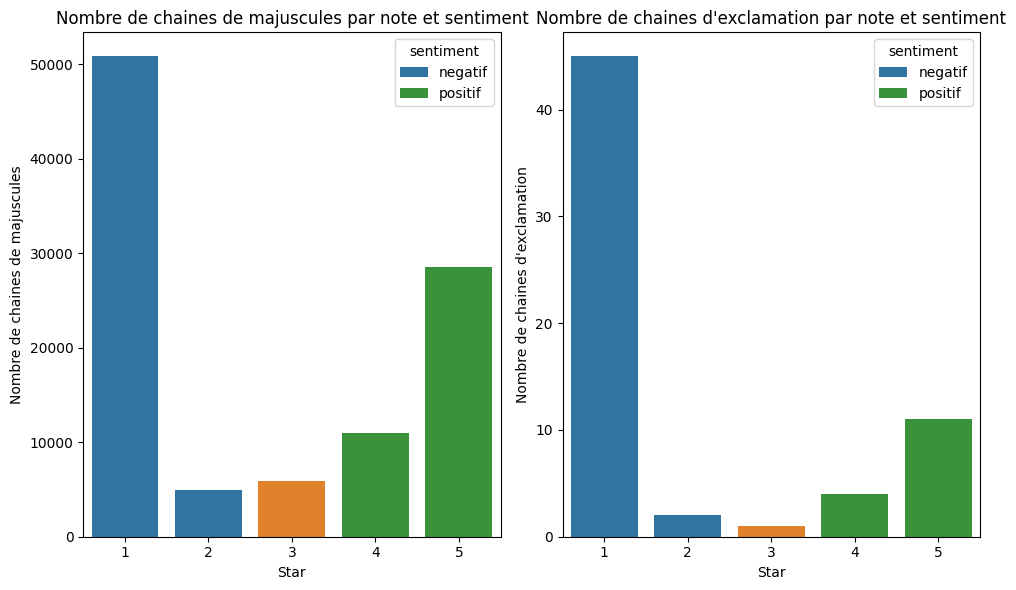

In [ ]:
# Extraction des exclamations et majuscules
import re

def findCAPSLOCK(tweet):
    r = re.compile(r"[A-Z]")
    capslock = r.findall(tweet)
    return len(capslock)

def find_chain_CAPSLOCK(tweet):
    r = re.compile(r"[A-Z]{2,}")
    capslock = r.findall(tweet)
    return len(capslock)

def find_exclamation(tweet):
    r = re.compile(r"\!")
    exclamation = r.findall(tweet)
    return len(exclamation)

def find_chain_exclamation(tweet):
    r = re.compile(r"(\! ){2,}")
    exclamation = r.findall(tweet)
    return len(exclamation)

df['capslock'] = df.commentaire.apply(lambda x: findCAPSLOCK(str(x)))
df['chain_capslock'] = df.commentaire.apply(lambda x: find_chain_CAPSLOCK(str(x)))
df['exclamation'] = df.commentaire.apply(lambda x: find_exclamation(str(x)))
df['chain_exclamation'] = df.commentaire.apply(lambda x: find_chain_exclamation(str(x)))

# Grouper les données par 'star' et 'sentiment', puis calculer la somme
grouped_data = df.groupby(['star', 'sentiment']).agg({
    'chain_capslock': 'sum',
    'chain_exclamation': 'sum'
}).reset_index()

# Création des graphiques
plt.figure(figsize=(10, 6))

# Graphique pour chain_capslock
plt.subplot(1, 2, 1)
sns.barplot(data=grouped_data, x='star', y='chain_capslock', hue='sentiment')
plt.title('Nombre de chaines de majuscules par note et sentiment')
plt.xlabel('Star')
plt.ylabel('Nombre de chaines de majuscules')

# Graphique pour chain_exclamation
plt.subplot(1, 2, 2)
sns.barplot(data=grouped_data, x='star', y='chain_exclamation', hue='sentiment')
plt.title("Nombre de chaines d'exclamation par note et sentiment")
plt.xlabel('Star')
plt.ylabel("Nombre de chaines d'exclamation")

plt.tight_layout()
plt.show()



Les internautes semblent exprimer leurs sentiments (positifs et négatifs) davantage avec des majuscules que des points d'exclamation.


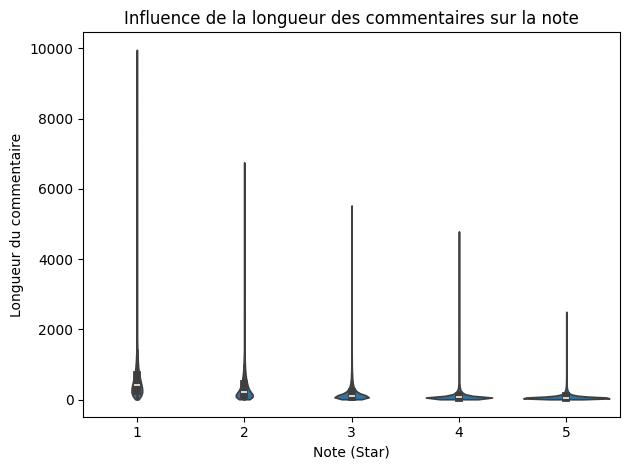

In [ ]:
# Influence de l'impact de la longueur d'un commentaire sur la note.

df['length'] = df['commentaire'].str.len()

fig, ax = plt.subplots()
sns.violinplot(x="star", y="length", data=df, ax=ax, cut=0)
ax.set_title('Influence de la longueur des commentaires sur la note')
ax.set_xlabel('Note (Star)')
ax.set_ylabel('Longueur du commentaire')
plt.tight_layout()
plt.show()



Les commentaires positifs (4, 5 étoiles) ont tendance à être plus concis.
Plus les notes deviennent négatives, plus les commentaires sont détaillés et représentent probablement des critiques explicatives données par des clients insatisfaits.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


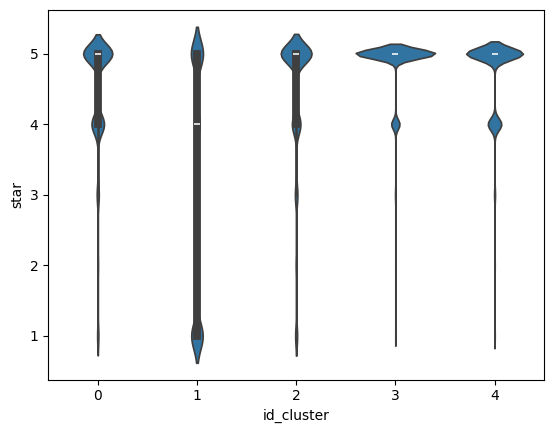

In [ ]:
# 1ère tentative de clusters complètement déséquilibrés, autre méthode:
# Vectoriser avec TfidfVectorizer et non pas CountVectorizer , nb de termes min max , mix d'unigramme, bigramme et trigramme

min_df = 0.01  # Les termes doivent apparaître dans 1% des docs
max_df = 0.25  # Les termes ne doivent pas apparaître dans plus de 75% des documents

ngram_range = (1, 3)

tfidf_vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, ngram_range=ngram_range, stop_words=stop_words_list)

vec_reponses = tfidf_vectorizer.fit_transform(df.cleaned_lemma)

km = KMeans(n_clusters=5, random_state=42)
km.fit(vec_reponses)

data = pd.DataFrame({'star': df.star.values})
data['id_cluster'] = km.labels_
fig, ax = plt.subplots()
sns.violinplot(y="star", x="id_cluster", data=data, ax=ax)
plt.show()


In [ ]:
# Importance relative des termes des clusters par rapport au corpus

tfidf_vectorizer = TfidfVectorizer(ngram_range=(3, 3))

tfidf_per_cluster = {}

for cluster_num in range(5):
    documents_in_cluster = df[km.labels_ == cluster_num].cleaned_lemma

    X_tfidf = tfidf_vectorizer.fit_transform(documents_in_cluster)

    scores = X_tfidf.toarray().mean(axis=0)
    terms = tfidf_vectorizer.get_feature_names_out()

    tfidf_per_cluster[cluster_num] = pd.DataFrame(data=scores, index=terms, columns=["TF-IDF"])
    tfidf_per_cluster[cluster_num] = tfidf_per_cluster[cluster_num].sort_values(by="TF-IDF", ascending=False)

    print(f"Top terms for cluster {cluster_num}:")
    print(tfidf_per_cluster[cluster_num].head(10))
    print("\n")

Top terms for cluster 0:
                        TF-IDF
bon site recommander  0.014305
bien bon produit      0.006552
bon site bon          0.006541
bien bon site         0.005981
bon produit bon       0.005084
bon site vente        0.005030
bon site achat        0.004549
tré bon site          0.004534
bon site commande     0.004276
bon rapport qualité   0.004089


Top terms for cluster 1:
                               TF-IDF
jamais être décevoir         0.002202
bien rien redire             0.001110
commande bien passer         0.001106
délai livraison respecter    0.000841
jamais problème cdiscount    0.000828
client année jamais          0.000748
contacter service client     0.000711
commande cdiscount jamais    0.000706
satisfait service cdiscount  0.000683
appeler service client       0.000673


Top terms for cluster 2:
                               TF-IDF
rapport qualité prix         0.012643
bon rapport qualité          0.008663
bien passer recommander      0.008399
passer rec

In [ ]:
# Fréquence au sein des clusters

order_centroids = km.cluster_centers_.argsort()[:, ::-1] # centre
terms = vectorizer.get_feature_names_out()


print("Termes les plus représentatifs pour le cluster 1:")
for i in order_centroids[0, :10]:
    print(' %s' % terms[i])

print("\nTermes les plus représentatifs pour le cluster 2:")
for i in order_centroids[1, :10]:
    print(' %s' % terms[i])

print("Termes les plus représentatifs pour le cluster 3:")
for i in order_centroids[2, :10]:
    print(' %s' % terms[i])

print("\nTermes les plus représentatifs pour le cluster 4:")
for i in order_centroids[3, :10]:
    print(' %s' % terms[i])

print("\nTermes les plus représentatifs pour le cluster 5:")
for i in order_centroids[4, :10]:
    print(' %s' % terms[i])

Termes les plus représentatifs pour le cluster 1:
 annuler commande jour
 année aucun problème
 client an problème
 annuler commande repasser
 cdiscount meilleur site
 cdiscount envoyer mail
 click and collect
 abonnement cdiscount volonté
 cher livraison rapide
 apporter aucun solution

Termes les plus représentatifs pour le cluster 2:
 article bon qualité
 année être satisfaire
 arriver service client
 click and collect
 bon service rapide
 choix prix compétitif
 cdiscount livraison rapide
 colis boîte lettre
 acheter fnac com
 cdiscount meilleur site
Termes les plus représentatifs pour le cluster 3:
 cdiscount envoyer mail
 client an problème
 apporter aucun solution
 cher livraison rapide
 client année recommander
 cdiscount meilleur site
 client fidèle an
 aujourd hui être
 bon service rapide
 cdiscount recommander site

Termes les plus représentatifs pour le cluster 4:
 bénéficier bon achat
 choix prix compétitif
 cdiscount rien faire
 article bon qualité
 bon service rapide
 che

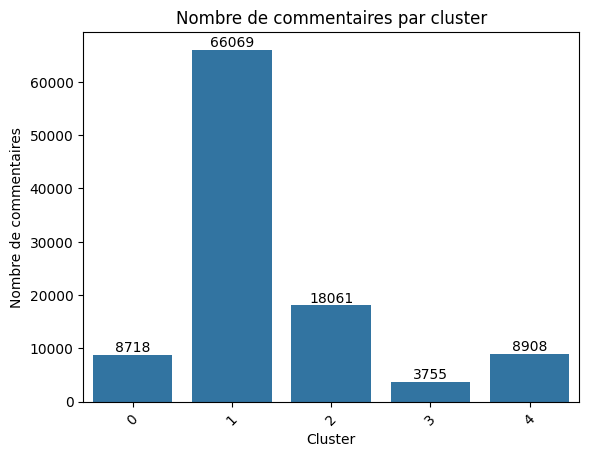

In [ ]:
df['cluster'] = km.labels_

# Nb de commentaires par cluster


clustercomm = df.groupby('cluster')['commentaire'].count()

sns.barplot(x=clustercomm.index, y=clustercomm.values)
plt.xlabel('Cluster')
plt.ylabel('Nombre de commentaires')
plt.title('Nombre de commentaires par cluster')
plt.xticks(rotation=45)
for index, value in enumerate(clustercomm.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

In [ ]:
# Nombre de commentaires positifs et négatifs par cluster
cluster_sentiment_counts = df.groupby(['cluster', 'sentiment']).size().unstack(fill_value=0)

# Proportions de commentaires positifs et négatifs pour une meilleure comparaison
cluster_sentiment_proportions = cluster_sentiment_counts.div(cluster_sentiment_counts.sum(axis=1), axis=0)

print(cluster_sentiment_counts)
print(cluster_sentiment_proportions)


sentiment  __label__NEUTRAL  negatif  positif
cluster                                      
0                       383      315     8020
1                      4861    26236    34972
2                       979     1116    15966
3                        26        6     3723
4                       106       74     8728
sentiment  __label__NEUTRAL   negatif   positif
cluster                                        
0                  0.043932  0.036132  0.919936
1                  0.073575  0.397100  0.529325
2                  0.054205  0.061791  0.884004
3                  0.006924  0.001598  0.991478
4                  0.011899  0.008307  0.979793


J'aimerais une meilleure représentation des commentaires négatifs pour savoir les problèmes précis auxquels les acheteurs sont confrontés:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


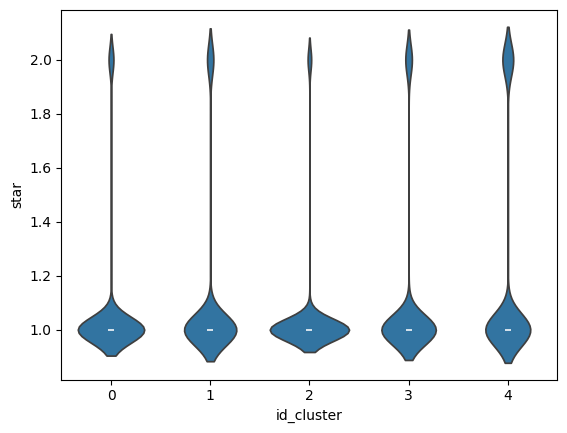

In [ ]:
# Focus sur commentaires négatifs
negative_comments = df[df['sentiment'] == 'negatif']

tfidf_vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.75, ngram_range=(1, 3), stop_words=stop_words_list)
vec_reponses_neg = tfidf_vectorizer.fit_transform(negative_comments.cleaned_lemma)

# Clustering
km_neg = KMeans(n_clusters=5, random_state=42)
km_neg.fit(vec_reponses_neg)

data_neg = pd.DataFrame({'star': negative_comments.star.values})
data_neg['id_cluster'] = km_neg.labels_

fig, ax = plt.subplots()
sns.violinplot(y="star", x="id_cluster", data=data_neg, ax=ax)
plt.show()


0     4045
1     4260
2     2870
3     5233
4    11339
Name: id_cluster, dtype: int64


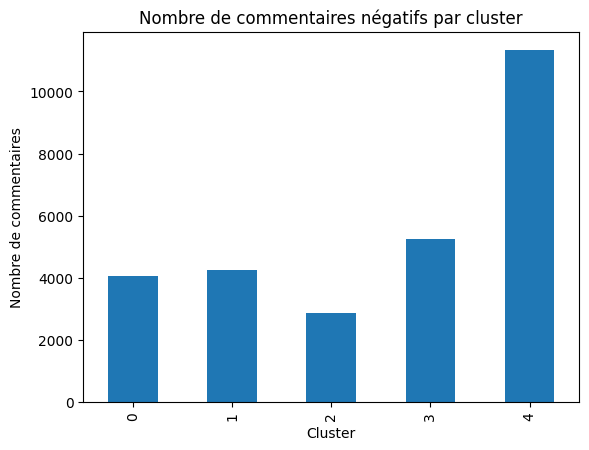

In [ ]:
# Nb de commentaires par cluster

cluster_counts = data_neg['id_cluster'].value_counts()

cluster_counts = cluster_counts.sort_index()
print(cluster_counts)

cluster_counts.plot(kind='bar')
plt.title('Nombre de commentaires négatifs par cluster')
plt.xlabel('Cluster')
plt.ylabel('Nombre de commentaires')
plt.show()
